In [1]:
#Real and fake face detection
#image from https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


In [2]:
from PIL import Image

for dirname, _, filenames in os.walk('../DeepLearning/archive (12)/real_and_fake_face'):
    for filename in filenames:
        if dirname == 'training_fake':
            print(os.path.join(dirname,filename))

In [3]:
'''
from PIL import Image
import numpy as np

fake_dir = '../DeepLearning/archive (12)/real_and_fake_face/training_fake'
real_dir = '../DeepLearning/archive (12)/real_and_fake_face/training_real'

data = []
labels = []

for filename in os.listdir(fake_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        img_path = os.path.join(fake_dir, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  
        img_array = np.array(img)
        data.append(img_array)
        labels.append(1)  # fake 레이블은 1로 지정

for filename in os.listdir(real_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        img_path = os.path.join(real_dir, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  
        img_array = np.array(img)
        data.append(img_array)
        labels.append(0)  # real 레이블은 0으로 지정
'''

'\nfrom PIL import Image\nimport numpy as np\n\nfake_dir = \'../DeepLearning/archive (12)/real_and_fake_face/training_fake\'\nreal_dir = \'../DeepLearning/archive (12)/real_and_fake_face/training_real\'\n\ndata = []\nlabels = []\n\nfor filename in os.listdir(fake_dir):\n    if filename.endswith(".jpg") or filename.endswith(".png"): \n        img_path = os.path.join(fake_dir, filename)\n        img = Image.open(img_path)\n        img = img.resize((224, 224))  \n        img_array = np.array(img)\n        data.append(img_array)\n        labels.append(1)  # fake 레이블은 1로 지정\n\nfor filename in os.listdir(real_dir):\n    if filename.endswith(".jpg") or filename.endswith(".png"): \n        img_path = os.path.join(real_dir, filename)\n        img = Image.open(img_path)\n        img = img.resize((224, 224))  \n        img_array = np.array(img)\n        data.append(img_array)\n        labels.append(0)  # real 레이블은 0으로 지정\n'

In [4]:
#data = np.array(data)
#labels = np.array(labels)

In [5]:
#np.save('./preprocess_data',data)
#np.save('./preprocess_label',labels)

In [6]:
data = np.load('./preprocess_data.npy')
labels = np.load('./preprocess_label.npy')

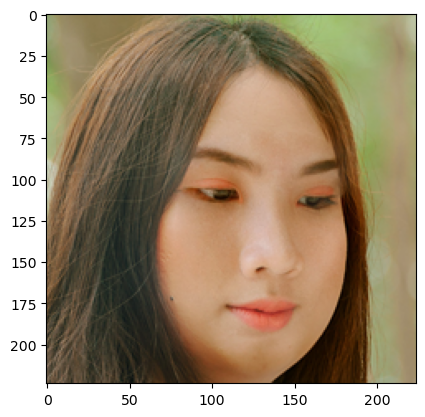

In [7]:
plt.imshow(data[0])

In [8]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

train_feat, test_feat, train_label, test_label = train_test_split(data,labels,test_size=0.7,random_state=42)



In [9]:
import torchvision.transforms as transforms
import cv2
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = Image.fromarray(self.data[idx])
        label = self.labels[idx]
        #image = cv2.cvtColor(self.data[idx], cv2.COLOR_BGR2RGB)

        if self.transform:
            image = self.transform(image)
            
        return image, label
    
torchvision_transform = transforms.Compose([transforms.ToTensor(), 
                                            transforms.Resize(224),
                                            
                                            transforms.RandomHorizontalFlip(p=0.5), 

                                            transforms.GaussianBlur(kernel_size=(3,3)),
                                            transforms.RandomSolarize(
                                                             p=0.4, 
                                                             threshold=0.95),
                                            
                                            transforms.Normalize(mean=(0.485, 0.456, 0.406), 
                                                              std=(0.229, 0.224, 0.225)), 
                                                  ])
'''
torchvision_transform = transforms.Compose([
    #transforms.RandomCrop(188),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    #transforms.RandomHorizontalFlip(p = 1),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.Resize(128),
])    
'''
train_data = CustomDataset(train_feat,train_label,transform=torchvision_transform)
test_data = CustomDataset(test_feat,test_label,transform=torchvision_transform)

In [10]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=2, shuffle=False)

In [11]:
import torch.nn as nn
import torch.optim as optim

learning_rate = 0.001
num_epochs = 50


In [12]:
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=18, kernel_size=3)
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.batchnorm_1 = nn.BatchNorm2d(18)
        self.conv_2 = nn.Conv2d(in_channels=18, out_channels=18, kernel_size=3)
        self.batchnorm_2 = nn.BatchNorm2d(18)
        self.conv_3 = nn.Conv2d(in_channels=18, out_channels=32, kernel_size=3)
        self.fc_1 = nn.Linear(21632, 128)
        self.fc_2 = nn.Linear(128, 64)
        self.classifier = nn.Linear(64, 1)
        
    def forward(self, x):
        x = self.maxpool(nn.functional.relu(self.conv_1(x)))
        x = self.maxpool(nn.functional.relu(self.conv_2(x)))
        x = self.maxpool(nn.functional.relu(self.conv_3(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc_1(x))
        x = nn.functional.relu(self.fc_2(x))
        x = torch.sigmoid(self.classifier(x))
        return x
'''

'\nclass CNNModel(nn.Module):\n    def __init__(self):\n        super(CNNModel, self).__init__()\n        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=18, kernel_size=3)\n        self.maxpool = nn.MaxPool2d(kernel_size=2)\n        self.batchnorm_1 = nn.BatchNorm2d(18)\n        self.conv_2 = nn.Conv2d(in_channels=18, out_channels=18, kernel_size=3)\n        self.batchnorm_2 = nn.BatchNorm2d(18)\n        self.conv_3 = nn.Conv2d(in_channels=18, out_channels=32, kernel_size=3)\n        self.fc_1 = nn.Linear(21632, 128)\n        self.fc_2 = nn.Linear(128, 64)\n        self.classifier = nn.Linear(64, 1)\n        \n    def forward(self, x):\n        x = self.maxpool(nn.functional.relu(self.conv_1(x)))\n        x = self.maxpool(nn.functional.relu(self.conv_2(x)))\n        x = self.maxpool(nn.functional.relu(self.conv_3(x)))\n        x = torch.flatten(x, 1)\n        x = nn.functional.relu(self.fc_1(x))\n        x = nn.functional.relu(self.fc_2(x))\n        x = torch.sigmoid(self.classifi

In [13]:
'''
#device = 'cpu'
model = CNNModel().to(device)
loss_func = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=5e-4)
'''

"\n#device = 'cpu'\nmodel = CNNModel().to(device)\nloss_func = nn.BCELoss()\noptimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=5e-4)\n"

In [14]:
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
from torchvision import models
model_p = models.resnet50(pretrained=True)
model_p.fc = nn.Sequential(nn.Linear(in_features=2048, out_features=512, bias=True), 
                     nn.ReLU(inplace=True),
                     nn.Linear(in_features=512, out_features=1, bias=True),
                     nn.Sigmoid())

loss_func = nn.BCELoss()
optimizer = optim.Adam(model_p.parameters(),lr=learning_rate,weight_decay=5e-4)
for param in model_p.parameters():
    param.requires_grad = True
model_p.to(device)


C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:

for i in range(num_epochs):
    t_total_loss = 0
    for image,label in train_dataloader:
        x = image.to(device)
        y = label.to(device,torch.float32)
        y = y.unsqueeze(1)
        optimizer.zero_grad()
        output = model_p.forward(x)
        loss = loss_func(output,y)
        loss.backward()
        t_total_loss += loss
        optimizer.step()
    print('training loss',t_total_loss)
    
    threshold = 0.5  # 임계값 설정 (0.5보다 크면 클래스 1로, 그렇지 않으면 클래스 0으로 이진화)

    corr = 0
    #total = 0
    with torch.no_grad():
        val_accuracy = 0
        for image,label in test_dataloader:
            label = label.to(device, torch.float32)  # 레이블을 디바이스로 이동합니다.
            #label = label.unsqueeze(1)
            output = model_p.forward(x)
            output_binary = (output > threshold).float()  # 출력값을 이진화합니다.
            #total += label.size(0)
            val_accuracy += ((output > 0.5) == label).float().mean().item() 
    print('acc test:',val_accuracy/len(test_dataloader))



training loss tensor(223.2154, grad_fn=<AddBackward0>)
acc test: 0.5181818181818182
training loss tensor(211.6175, grad_fn=<AddBackward0>)
acc test: 0.5181818181818182
training loss tensor(211.3648, grad_fn=<AddBackward0>)
acc test: 0.5181818181818182
